In [1]:
import numpy as np 
import tensorflow as tf 
import keras  
from matplotlib import pyplot as plt 
import cv2 as cv 
import os

Data Visuvalization

In [ ]:
import os

def get_file_path(directory, filename):
    return os.path.join(directory, filename)

def get_image_data(directory, files):
    image_data = []
    for file in files:
        path = get_file_path(directory, file)
        image = cv.imread(path)
        image_data.append(image)
    return image_data


directory_setosa= r'A:\deeplearning\iris-setosa'
files_setosa = os.listdir(directory_setosa)
setosa_data = get_image_data(directory_setosa, files_setosa)

directory_versicolour= r'A:\deeplearning\iris-versicolour'
files_versicolour = os.listdir(directory_versicolour)
versicolour_data = get_image_data(directory_versicolour, files_versicolour)

directory_virginica= r'A:\deeplearning\iris-virginica'
files_virginica = os.listdir(directory_virginica)
virginica_data = get_image_data(directory_virginica, files_virginica)



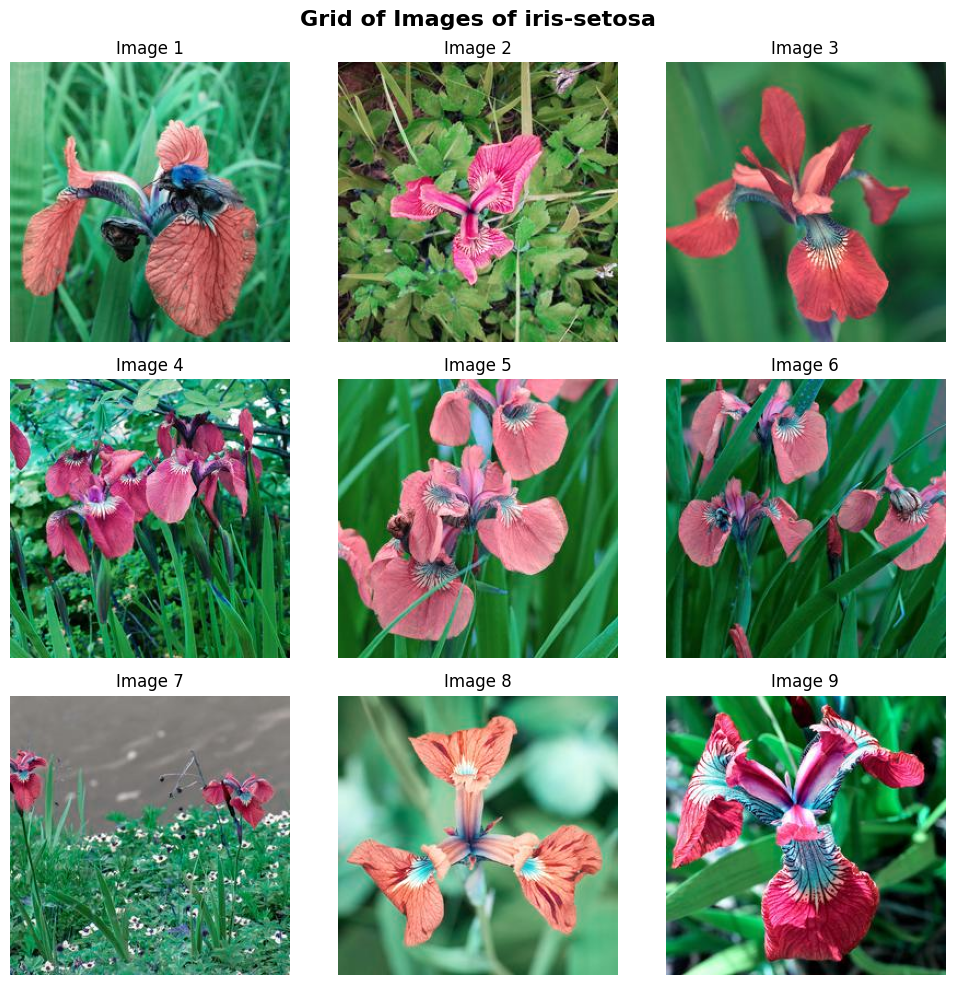

In [3]:

fig, axs = plt.subplots(3, 3, figsize=(10, 10))

for i in range(3):
    for j in range(3):
        axs[i, j].imshow(setosa_data[i*3 + j])
        axs[i, j].set_title(f'Image {i*3 + j + 1}')
        axs[i, j].axis('off')

fig.suptitle('Grid of Images of iris-setosa', fontsize=16, weight='bold')
plt.tight_layout()
plt.show()


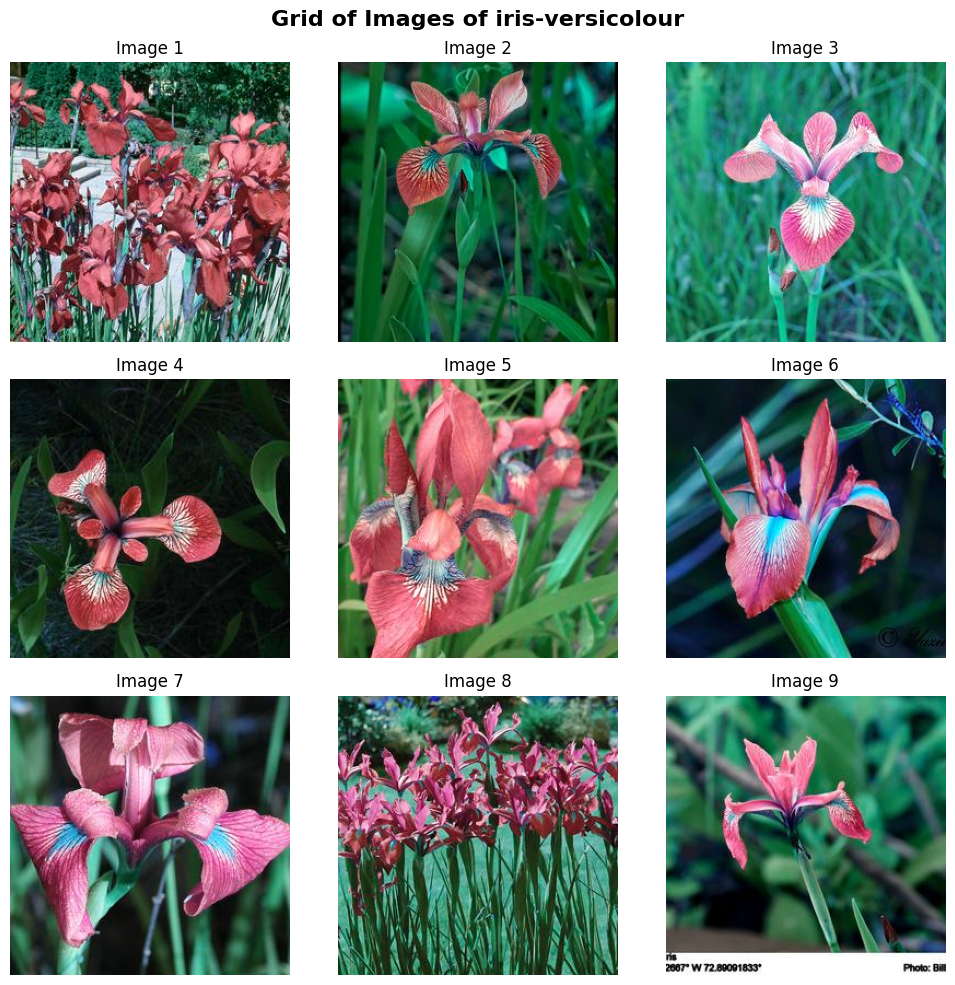

In [4]:
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

for i in range(3):
    for j in range(3):
        axs[i, j].imshow(versicolour_data[i*3 + j])
        axs[i, j].set_title(f'Image {i*3 + j + 1}')
        axs[i, j].axis('off')

fig.suptitle('Grid of Images of iris-versicolour', fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

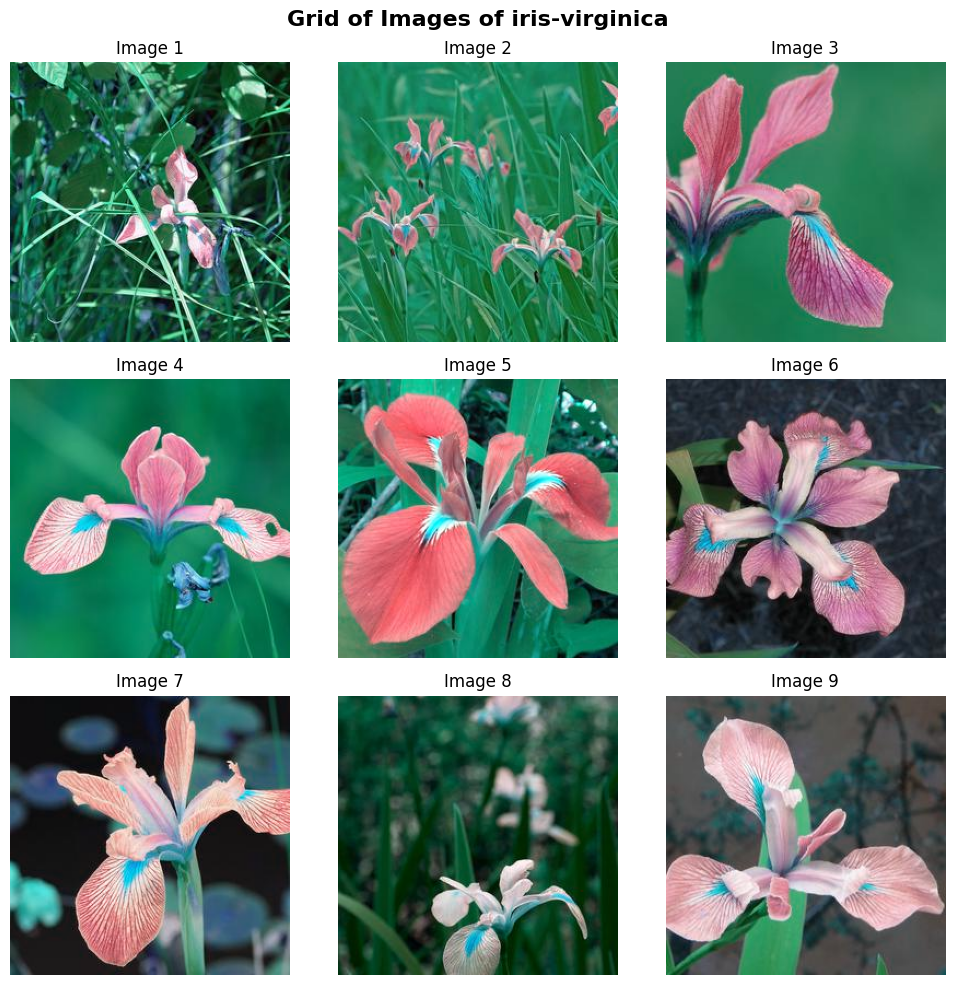

In [5]:
fig, axs = plt.subplots(3, 3, figsize=(10, 10))

for i in range(3):
    for j in range(3):
        axs[i, j].imshow(virginica_data[i*3 + j])
        axs[i, j].set_title(f'Image {i*3 + j + 1}')
        axs[i, j].axis('off')

fig.suptitle('Grid of Images of iris-virginica', fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

Test-Train Split

In [6]:
def data_gen(train_data,test_data,total_train,total_test,index,y_train,y_test):
    for i in total_train:
        train_data.append(i)
        y_train.append(index)
    for j in total_test:
        test_data.append(j)
        y_test.append(index)
    return train_data,test_data,y_train,y_test

test_size=0.20
test_data=[]
train_data=[]
y_train=[]
y_test=[]

setosa_index=int(len(setosa_data)*(test_size))
setosa_test=setosa_data[:setosa_index]
setosa_train=setosa_data[setosa_index:]
train_data,test_data,y_train,y_test=data_gen(train_data,test_data,setosa_train,setosa_test,0,y_train,y_test)


versicolour_index=int(len(versicolour_data)*(test_size))
versicolour_test=versicolour_data[:versicolour_index]
versicolour_train=versicolour_data[versicolour_index:]
train_data,test_data,y_train,y_test=data_gen(train_data,test_data,versicolour_train,versicolour_test,1,y_train,y_test)


virginica_index=int(len(virginica_data)*(test_size))
virginica_test=virginica_data[:virginica_index]
virginica_train=virginica_data[virginica_index:]
train_data,test_data,y_train,y_test=data_gen(train_data,test_data,virginica_train,virginica_test,2,y_train,y_test)






In [7]:
print(len(train_data),len(test_data),len(y_train),len(y_test))

338 83 338 83


In [8]:
train_data=np.array(train_data)
test_data=np.array(test_data)


In [9]:
print(train_data.shape,test_data.shape)

(338, 256, 256, 3) (83, 256, 256, 3)


In [10]:
y_train=np.array(y_train)
y_test=np.array(y_test)

CNN Model

In [11]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu', strides=(1, 1), padding='same', input_shape=(256,256,3)),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(filters=64, kernel_size=(5,5), activation='relu', strides=(1, 1), padding='same'),
    keras.layers.MaxPool2D((2,2)), 
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv2D(filters=96, kernel_size=(3,3), activation='relu', strides=(1, 1), padding='same'),
    keras.layers.MaxPool2D((2,2)), 
    keras.layers.BatchNormalization(),
    
    # Dense layers
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(3, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 32)      0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 128, 128, 32)      128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      51264     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 64)        0         
 g2D)                                                            
                                                     

In [12]:

history = model.fit(train_data,y_train,epochs=25)

Epoch 1/25


11/11 [==============================] - 19s 1s/step - loss: 3.8642 - accuracy: 0.5089
Epoch 2/25
11/11 [==============================] - 16s 1s/step - loss: 1.4604 - accuracy: 0.6272
Epoch 3/25
11/11 [==============================] - 16s 1s/step - loss: 1.0481 - accuracy: 0.6391
Epoch 4/25
11/11 [==============================] - 15s 1s/step - loss: 0.9081 - accuracy: 0.6391
Epoch 5/25
11/11 [==============================] - 16s 1s/step - loss: 1.1091 - accuracy: 0.6391
Epoch 6/25
11/11 [==============================] - 14s 1s/step - loss: 0.9123 - accuracy: 0.6420
Epoch 7/25
11/11 [==============================] - 14s 1s/step - loss: 0.8632 - accuracy: 0.6361
Epoch 8/25
11/11 [==============================] - 15s 1s/step - loss: 0.8260 - accuracy: 0.6391
Epoch 9/25
11/11 [==============================] - 15s 1s/step - loss: 0.7736 - accuracy: 0.6420
Epoch 10/25
11/11 [==============================] - 15s 1s/step - loss: 0.7561 - accuracy: 0.6420
Epoch 11/25
11/11

In [13]:
model.evaluate(test_data,y_test)

3/3 [==============================] - 2s 339ms/step - loss: 1.2217 - accuracy: 0.6386


[1.2217381000518799, 0.6385542154312134]

In [14]:
y_pred=model.predict(test_data)

3/3 [==============================] - 1s 332ms/step


In [15]:
y_pred_labels=[np.argmax(i) for i in y_pred]

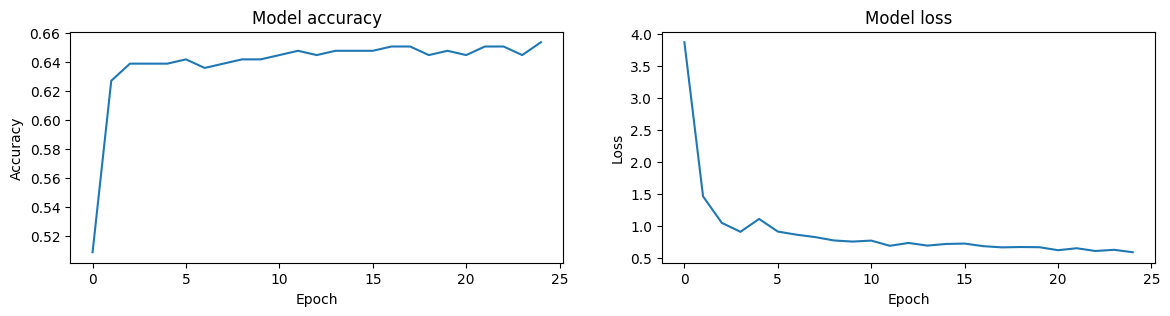

In [16]:
plt.figure(figsize=(14, 3))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.show()

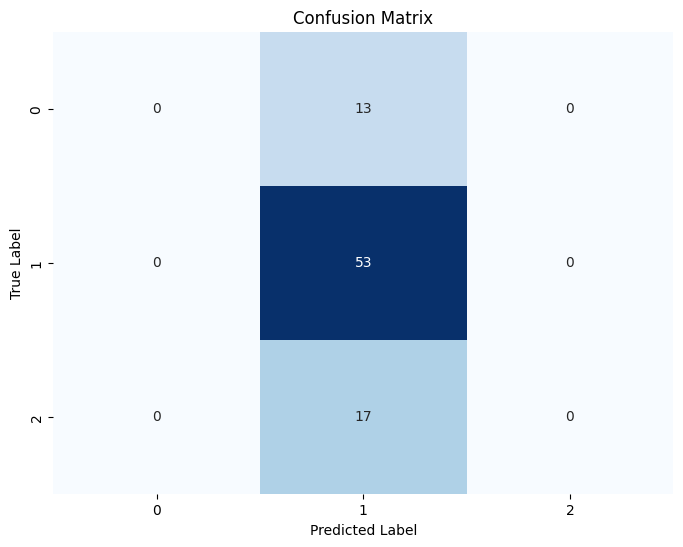

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [18]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred_labels)

print(report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.64      1.00      0.78        53
           2       0.00      0.00      0.00        17

    accuracy                           0.64        83
   macro avg       0.21      0.33      0.26        83
weighted avg       0.41      0.64      0.50        83



C:\Users\nagab\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\nagab\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\nagab\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classificati

Transfer Learning

In [19]:
from keras.applications import VGG16

pretrained_model_full = VGG16(include_top=False, weights='imagenet',input_shape=(256,256,3))
pretrained_model_full.summary()

58889256/58889256 [==============================] - 166s 3us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                            

In [20]:
vgg_features_train = pretrained_model_full.predict(train_data)


11/11 [==============================] - 44s 4s/step


In [21]:
print(vgg_features_train.shape)

(338, 8, 8, 512)


In [22]:
model_connect=keras.Sequential(
    [
        keras.layers.Flatten(input_shape=(8, 8, 512)),
        keras.layers.Dense(100,activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.BatchNormalization(),

        keras.layers.Dense(10,activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.BatchNormalization(),

        keras.layers.Dense(3,activation='softmax')

    ]
)

model_connect.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model_connect.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 dense_3 (Dense)             (None, 100)               3276900   
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 batch_normalization_3 (Bat  (None, 100)               400       
 chNormalization)                                                
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
 dropout_2 (Dropout)         (None, 10)                0         
                                                      

In [23]:
history_pre=model_connect.fit(vgg_features_train,y_train,epochs=30,batch_size=110)

Epoch 1/30
4/4 [==============================] - 2s 90ms/step - loss: 1.4853 - accuracy: 0.3935
Epoch 2/30
4/4 [==============================] - 0s 69ms/step - loss: 1.1028 - accuracy: 0.4970
Epoch 3/30
4/4 [==============================] - 0s 64ms/step - loss: 1.0372 - accuracy: 0.4941
Epoch 4/30
4/4 [==============================] - 0s 74ms/step - loss: 0.9876 - accuracy: 0.5325
Epoch 5/30
4/4 [==============================] - 0s 76ms/step - loss: 0.9356 - accuracy: 0.5947
Epoch 6/30
4/4 [==============================] - 0s 67ms/step - loss: 0.9870 - accuracy: 0.5444
Epoch 7/30
4/4 [==============================] - 0s 65ms/step - loss: 0.9405 - accuracy: 0.5533
Epoch 8/30
4/4 [==============================] - 0s 69ms/step - loss: 0.8878 - accuracy: 0.5947
Epoch 9/30
4/4 [==============================] - 0s 62ms/step - loss: 0.8940 - accuracy: 0.6331
Epoch 10/30
4/4 [==============================] - 0s 69ms/step - loss: 0.9425 - accuracy: 0.5917
Epoch 11/30
4/4 [============

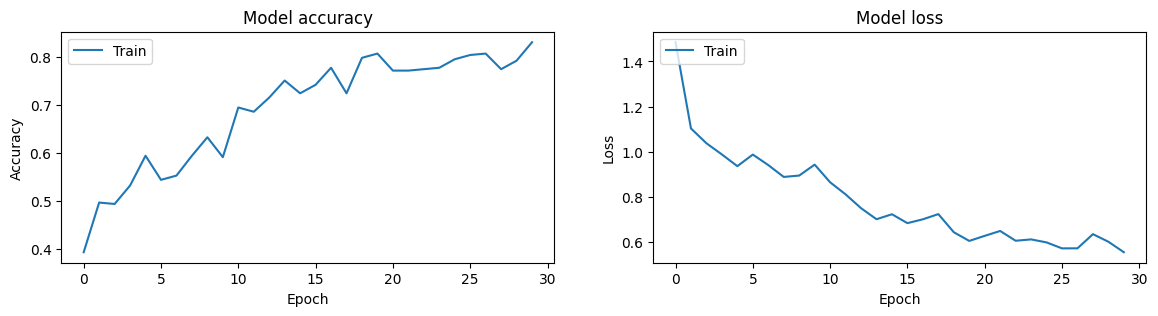

In [24]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14, 3))

plt.subplot(1, 2, 1)
plt.plot(history_pre.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left') 

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_pre.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')  

plt.show()

In [25]:
vgg_features_test= pretrained_model_full.predict(test_data)
model_connect.evaluate(vgg_features_test,y_test)

3/3 [==============================] - 1s 7ms/step - loss: 0.8250 - accuracy: 0.6627


[0.8250085115432739, 0.6626505851745605]

In [26]:
y_pred=model_connect.predict(vgg_features_test)
y_pred_labels=[np.argmax(i) for i in y_pred]

cm = confusion_matrix(y_test, y_pred_labels)



3/3 [==============================] - 0s 12ms/step


In [27]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred_labels)

print(report)

              precision    recall  f1-score   support

           0       1.00      0.15      0.27        13
           1       0.66      1.00      0.80        53
           2       0.00      0.00      0.00        17

    accuracy                           0.66        83
   macro avg       0.55      0.38      0.35        83
weighted avg       0.58      0.66      0.55        83

